# Oppgave 7

Oppgavesettet er gitt som følger:
- Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).

- Plot this metric while increasing the number of clusters, e.g., k=2..30 (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).

- Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

### Oppgave 1 og 2
Laster inn UCI Soppdatasett og bruker k-means og en metode for å evaluere klynger til å finne det optimale antallet av disse klyngene. Ser at man kan bruke noe kalt WCSS, eller "Within Cluster Sum of Squares". Dette bygger på euklidsk distanse som vi har hatt om i Big Data. Dette skal gi en indikasjon på hvor mange klynger som er optimalt, utifra hvor stor forskjell det er på k=x og k=y. Derfor ser man etter denne knekken i "albuemetoden" som jeg viser lengre ned. 


In [1]:
import pandas as pd
import numpy as np
# Use KMeans and PCA from sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%precision 3
plt.style.use('ggplot')

# Load the data
df_mushrooms = pd.read_csv("Data/agaricus-lepiota.csv")
df_dummies = pd.get_dummies(df_mushrooms.drop('edibility', axis='columns'))
# Dropper 'edibility' ettersom det er klassen vår

Ettersom vi nå skal bruke PCA, ønsker vi finne ut hvor mange komponenter vi ønsker ha med oss videre etter dimensionality reduction. Plotter en graf som viser varians med x antall komponenter. 

Text(0, 0.5, 'Cumulative Explained Variance')

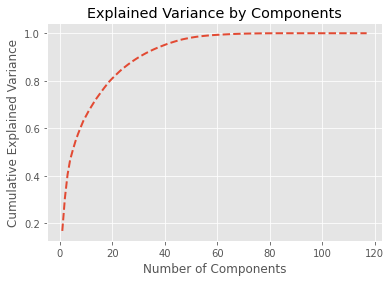

In [2]:
# Have to decide how many features to keep in pca 
pca = PCA()
pca.fit(df_dummies)
# print(pca.explained_variance_) # len() = 117
plt.figure()
plt.plot(range(1, 118), pca.explained_variance_ratio_.cumsum(), linestyle='--', linewidth=2)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Som en tommelfingerregel ønsker vi beholde minst 80% av variansen, og finner antall n-komponenter til å være rundt 20. pca(n_components=?) kan ta inn både antall komponenter men også prosent varians vi ønsker, så kan skrive 0.8 for 80% varians. Ser at en del eksempler på nett bruker n_components=2, skjønner ikke helt hvorfor. Da mister man varians

NB! Jeg testet senere med 0.97 varians

In [3]:
pca = PCA(n_components=0.8)
df_pca = pca.fit_transform(df_dummies)
print("Redusert antall features:", df_pca.shape[1])

Redusert antall features: 20


Skal nå prøve finne det optimale antall klynger basert på dette. Bruker K-Means i kombinasjon med WCSS (Within Cluster Sum of Squares) og "The Elbow method". Albuemetoden betyr at man prøver finne det punktet på grafen der du har en "albue", der grafen knekker mest. Bruker attributtet .inertia_ fra kmeans som gir meg summen av distansene kvadrert. 

In [4]:
wcss = []
for i in range(1, 31):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++')
    kmeans_pca.fit(df_pca)
    wcss.append(kmeans_pca.inertia_)

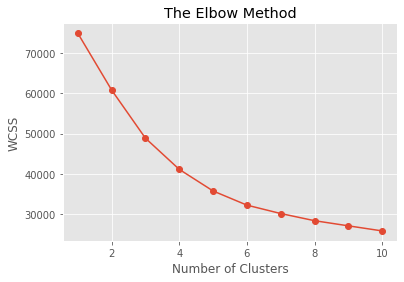

In [5]:
plt.figure()
plt.plot(range(1,11), wcss[:10], marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Startet med å bruke k=1..30, og så på albuemetode-grafen at et fint punkt kunne være 6 klynger. En albue, altså der grafen bremser betydelig, kan være en god klyngestørrelse. Samtidig ville jeg se litt nærmere på punktene fra 2-5 ettersom jeg ikke synes det var så lett å se på 1..30, så prøvde 1..10. Her synes jeg det så mest ut som 3 eller 4 kunne være best størrelser. Har printet ut grafen for k=1..30 under som del av oppgave 2.

Tar med meg videre størrelsene 3, 4 og 6.

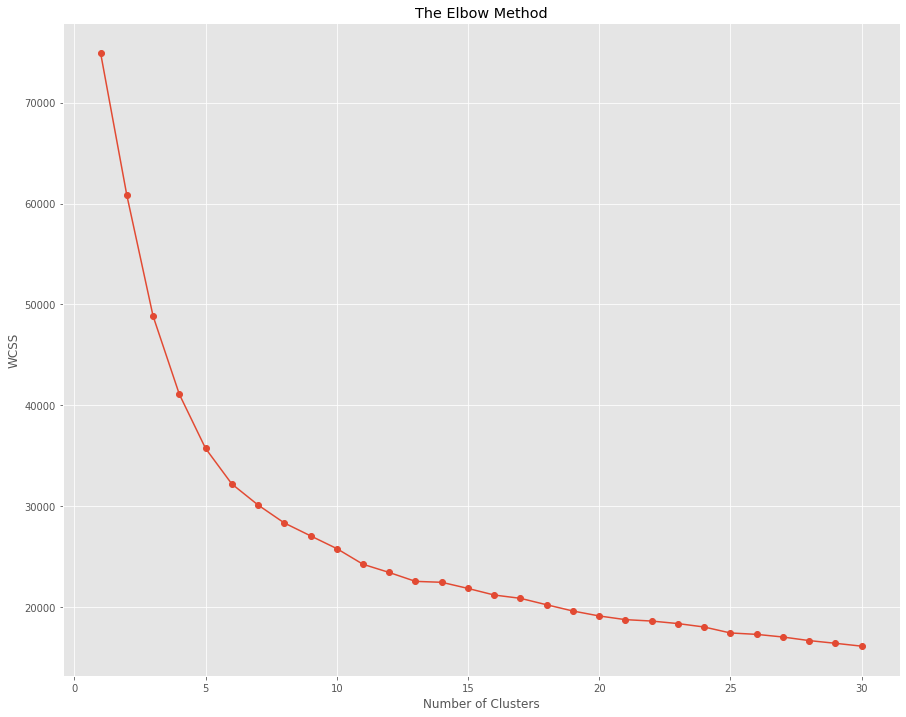

In [6]:
plt.figure(figsize=(15, 12))
plt.plot(range(1,31), wcss, marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Oppgave 3
Skal nå plotte en clustering med KMeans med disse klyngestørrelsene. Velger å plotte for k=2..7 for å få med k=2 (En logisk tanke fordi klassen spisbarhet kun har to ulike målverdier), k=3, k=4 og k=6 (De verdiene jeg fant). 

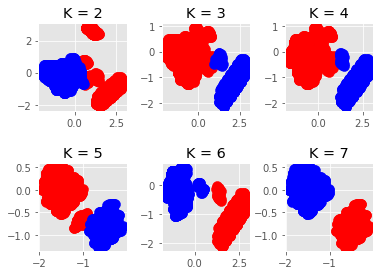

In [7]:
figure, axs = plt.subplots(2,3)
plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.6, wspace=0.4)
for i in range(1,7):
    k = i+1
    x = int((i-1)/3)
    y = ((i-1)%3)
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    Ypreds = kmeans.fit_predict(df_pca)
    axs[x, y].title.set_text(f'K = {k}')
    axs[x, y].scatter(df_pca[Ypreds == 0, 0], df_pca[Ypreds == 0, 1], s = 100, c = 'red', label = 'edible')
    axs[x, y].scatter(df_pca[Ypreds == 1, 0], df_pca[Ypreds == 1, 1], s = 100, c = 'blue', label = 'poisonous')
plt.show()

Ser at klyngestørrelser som k=3, k=4 og k=6 ser ganske bra ut, men også k=7